## Ridge Regression

#### Standardize data

In [50]:


# Standardize the data using StandardScaler from scikit-learn
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


##### Ridge Regression Model

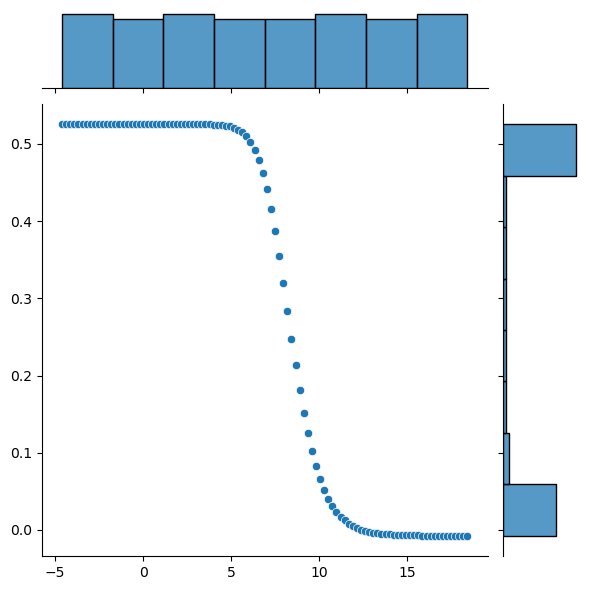

In [52]:
# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

from sklearn.model_selection import validation_curve


# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [53]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

# Train a Ridge regression model with the best alpha
lm_r_best = Ridge(alpha = param_range[30])
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231)

##### Evaluate the model on the testing and training data

In [54]:
# Predicting values for the training and test datasets using a Ridge regression model with the best hyperparameters.
y_train_lm_r_best = lm_r_best.predict(x_train_s)
y_test_lm_r_best = lm_r_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_r_best_train = r2_score(y_train, y_train_lm_r_best)
r2_lm_r_best_test = r2_score(y_test, y_test_lm_r_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_r_best_train = mean_squared_error(y_train, y_train_lm_r_best)
mse_lm_r_best_test = mean_squared_error(y_test, y_test_lm_r_best)

In [55]:
# Print the results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_r_best_train:.4f}, Test: {r2_lm_r_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_r_best_train:.4f}, Test: {mse_lm_r_best_test:.4f}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.5335, Test: 0.5366
Mean Squared Error (MSE) - Train: 75028518.5878, Test: 68763923.8062



## Lasso regression

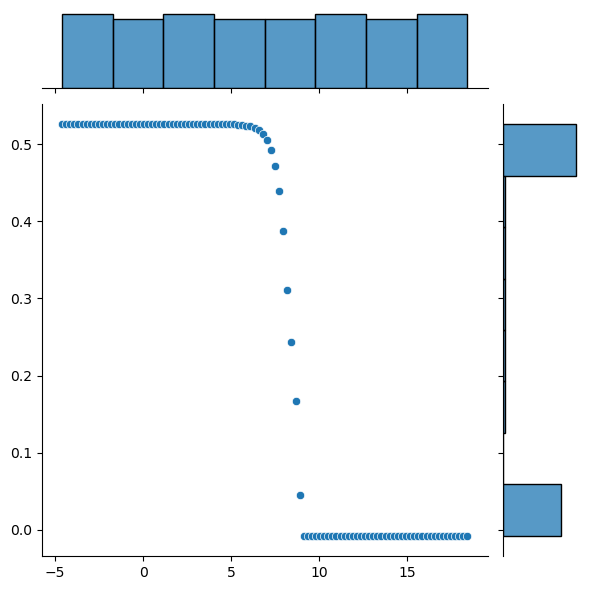

In [56]:
# Define a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), x_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l)

In [57]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

# Train a Lasso regression model with the best alpha
lm_l_best = Lasso(alpha = param_range2[39])
lm_l_best.fit(x_train_s, y_train)

Lasso(alpha=86.97490026177834)

##### Evaluate the Lasso model on the testing and training data

In [58]:
# Predicting values for the training and test datasets using a Lasso regression model with the best hyperparameters.
y_train_lm_l_best = lm_l_best.predict(x_train_s)
y_test_lm_l_best = lm_l_best.predict(x_test_s)

# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
r2_lm_l_best_train = r2_score(y_train, y_train_lm_l_best)
r2_lm_l_best_test = r2_score(y_test, y_test_lm_l_best)

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
mse_lm_l_best_train = mean_squared_error(y_train, y_train_lm_l_best)
mse_lm_l_best_test = mean_squared_error(y_test, y_test_lm_l_best)

In [59]:
# Print the results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: {r2_lm_l_best_train:.4f}, Test: {r2_lm_l_best_test:.4f}")
print(f"Mean Squared Error (MSE) - Train: {mse_lm_l_best_train:.4f}, Test: {mse_lm_l_best_test:.4f}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5332, Test: 0.5374
Mean Squared Error (MSE) - Train: 75080196.9627, Test: 68643390.1817

